### Problem Set 6: Clustering

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.cluster import KMeans

#### Getting the data from the dataset

In [71]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', usecols=['Height', 'Weight', 'Obesity_Level'])

data.head()

,Height,Weight,Obesity_Level
0,1.62,64.0,Normal_Weight
1,1.52,56.0,Normal_Weight
2,1.80,77.0,Normal_Weight
3,1.80,87.0,Overweight_Level_I
4,1.78,89.8,Overweight_Level_II


#### Converting the label to numeric

In [72]:
encoder = LabelEncoder()

data['Obesity_Level'] = encoder.fit_transform(data['Obesity_Level'])

In [73]:
data.describe()

,Height,Weight,Obesity_Level
count,2111.000000,2111.000000,2111.000000
mean,1.701677,86.586058,3.015632
std,0.093305,26.191172,1.952090
min,1.450000,39.000000,0.000000
25%,1.630000,65.473343,1.000000
50%,1.700499,83.000000,3.000000
75%,1.768464,107.430682,5.000000
max,1.980000,173.000000,6.000000


#### Normalizing the data

In [74]:
scaler = MinMaxScaler()

data['Height'] = scaler.fit_transform(data[['Height']])
data['Weight'] = scaler.fit_transform(data[['Weight']])

data.head()

,Height,Weight,Obesity_Level
0,0.320755,0.186567,1
1,0.132075,0.126866,1
2,0.660377,0.283582,1
3,0.660377,0.358209,5
4,0.622642,0.379104,6


#### Visualizing the data using scatterplot

<Axes: xlabel='Height', ylabel='Weight'>

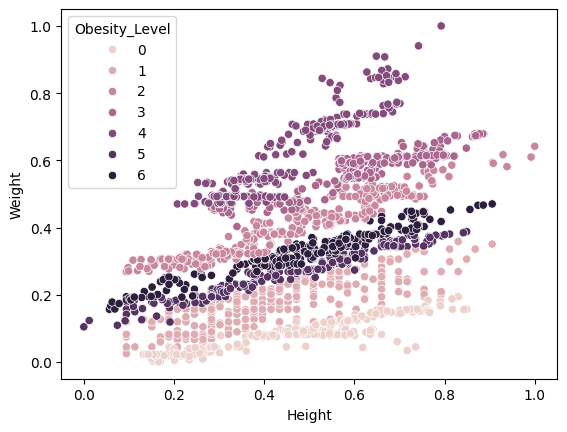

In [75]:
sns.scatterplot(data = data, x='Height', y='Weight', hue='Obesity_Level')

#### Splitting the data features and labels

In [76]:
X = data.drop('Obesity_Level', axis=1)
y = data['Obesity_Level']

#### Creating the model

In [77]:
clusters = 4

model = KMeans(n_clusters=clusters, random_state=0, n_init='auto')

model.fit(X)

KMeans(n_clusters=4, n_init='auto', random_state=0)

#### Visualizing model predictions

<Axes: xlabel='Height', ylabel='Weight'>

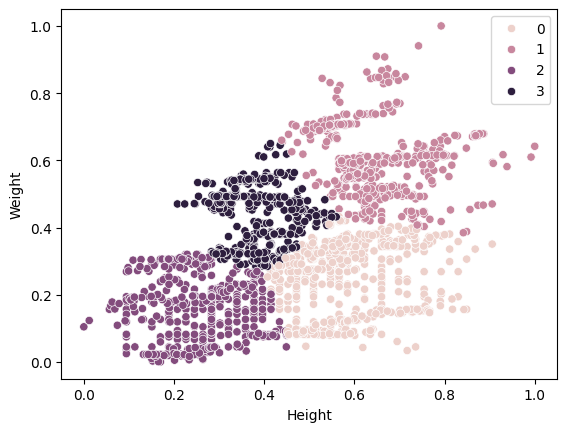

In [78]:
sns.scatterplot(data = X, x = 'Height', y = 'Weight', hue = model.labels_)